In [1]:
# Import the numpy library
import numpy as np
# Import the ``ansys.dpf.core`` module
from ansys.dpf import core as dpf
# Import the operators module
from ansys.dpf.core import operators as ops

In [2]:
# Define the mesh dimensions
length = 0.1
width = 0.05
depth = 0.1
num_nodes_in_length = 10
num_nodes_in_width = 5
num_nodes_in_depth = 10
# Create a MeshedRegion object
my_meshed_region = dpf.MeshedRegion()

In [3]:
def search_sequence_numpy(arr, node):
    """Find the node location in an array of nodes and return its index."""
    indexes = np.isclose(arr, node)
    match = np.all(indexes, axis=1).nonzero()
    return int(match[0][0])

In [4]:
node_id = 1
for i, x in enumerate(
    [float(i) * length / float(num_nodes_in_length) for i in range(0, num_nodes_in_length)]
):
    for j, y in enumerate(
        [float(i) * width / float(num_nodes_in_width) for i in range(0, num_nodes_in_width)]
    ):
        for k, z in enumerate(
            [float(i) * depth / float(num_nodes_in_depth) for i in range(0, num_nodes_in_depth)]
        ):
            my_meshed_region.nodes.add_node(node_id, [x, y, z])
            node_id += 1

In [5]:
my_nodes_coordinates = my_meshed_region.nodes.coordinates_field

In [6]:
my_meshed_region.unit = "mm"

In [7]:
# Get the nodes coordinates data
my_nodes_coordinates_data = my_nodes_coordinates.data
# As we use the connectivity function we need to get the data as a list
my_nodes_coordinates_data_list = my_nodes_coordinates.data_as_list
# Set the nodes scoping
my_coordinates_scoping = my_nodes_coordinates.scoping

In [8]:
# Add solid elements (linear hexa with eight nodes):
element_id = 1
# Precompute node spacings
dx = length / float(num_nodes_in_length)
dy = width / float(num_nodes_in_width)
dz = depth / float(num_nodes_in_depth)
# Generate node coordinates
x_coords = [i * dx for i in range(num_nodes_in_length - 1)]
y_coords = [j * dy for j in range(num_nodes_in_width - 1)]
z_coords = [k * dz for k in range(num_nodes_in_depth - 1)]
# Iterate through the grid
for x in x_coords:
    for y in y_coords:
        for z in z_coords:
            coord1 = np.array([x, y, z])
            connectivity = []
            # Generate connectivity for the current element
            for xx in [x, x + dx]:
                for yy in [y, y + dy]:
                    for zz in [z, z + dz]:
                        scoping_index = search_sequence_numpy(my_nodes_coordinates_data,
                                                           [xx, yy, zz])
                        connectivity.append(scoping_index)
            # Rearrange connectivity to maintain element orientation
            connectivity[2], connectivity[3] = connectivity[3], connectivity[2]
            connectivity[6], connectivity[7] = connectivity[7], connectivity[6]
            # Add the solid element
            my_meshed_region.elements.add_solid_element(element_id, connectivity)
            element_id += 1

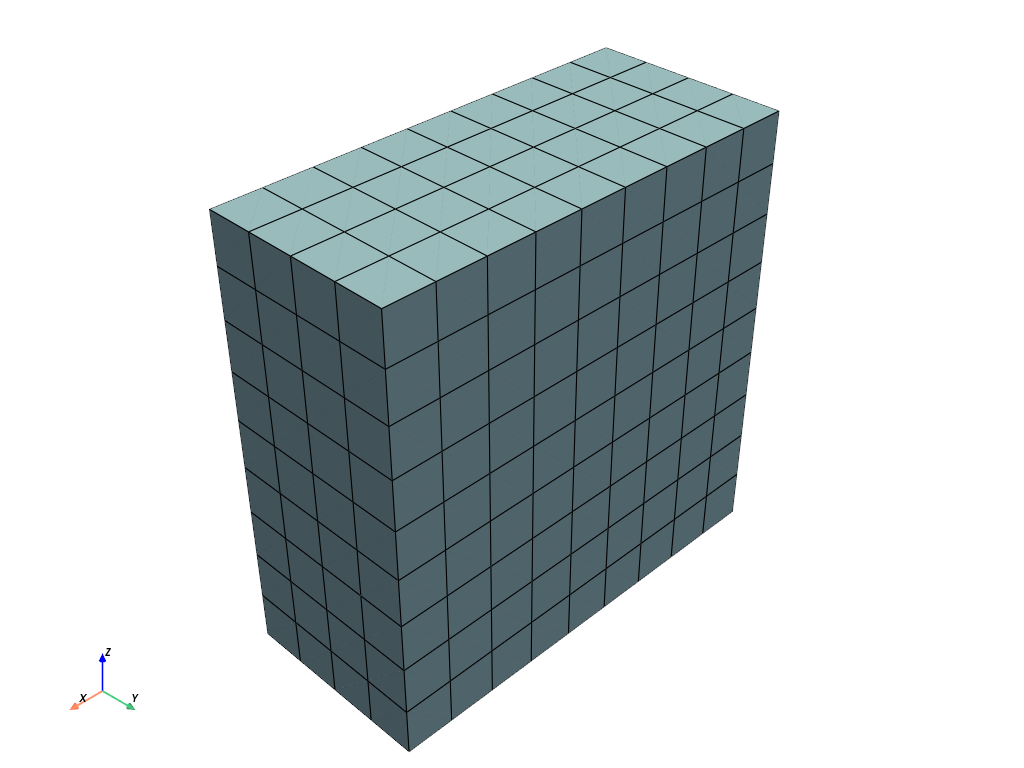

(None, <pyvista.plotting.plotter.Plotter at 0x22ab57a9250>)

In [9]:
# Plot the mesh
my_meshed_region.plot()